<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Walmart_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Case Study

# 1. Objective

##### Identify the Customer characteristics

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

### Import and read the dataset

In [2]:
dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
wmart_df = pd.read_csv(dataset_url)

# 2. Statistical Summary


### List the data properties

##### Basic info of the dataset

In [ ]:
# Basic info of the dataset
wmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


##### Description of the dataset

In [3]:
# Description of the dataset
wmart_df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


##### Size of the dataset

In [ ]:
# Size of the datset. 
wmart_df.size

5500680

##### Shape of the dataset

In [ ]:
wmart_df.shape

(550068, 10)

###### Shape of the dataset indicates, there are 5 lakhs plus records with 10 columns

##### Columns/Product Attributes

In [ ]:
wmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

##### Data Types of Product Attributes

In [ ]:
wmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

##### Top 5 Rows

In [ ]:
wmart_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##### Bottom 5 Rows

In [ ]:
wmart_df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


# 3. Data Pre-processing
### Data Preparation

##### Check for Null Values

In [ ]:
wmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

###### Above result indicates that, there is no null value for any of the attributes in the given dataset.

##### Check for duplicates

In [ ]:
wmart_df.duplicated().sum()

0

##### take a copy of the Dataset

In [4]:
working_df = wmart_df.copy()

##### Data Type Updates

In [7]:
# Convert the attributes to appropriate types
working_df['Gender'] = working_df['Gender'].astype('category')
working_df['Marital_Status'] = working_df['Marital_Status'].astype('category')
working_df['Product_Category'] = working_df['Product_Category'].astype('category')

In [12]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(3), int64(3), object(4)
memory usage: 31.0+ MB


# 4. Exploratory Data Analysis
### Graphical & non-graphical analysis of Uni & Bi-variate elements

##### Count by Products

In [41]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].value_counts()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

,Products Count
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1
P00204442,1


In [43]:
prod_cnt.head(25)

,Products Count
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442
5,P00193542
6,P00184942
7,P00346142
8,P0097242
9,P00274942


In [42]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].unique()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

,Products Count
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442
...,...
3626,P00375436
3627,P00372445
3628,P00370293
3629,P00371644


In [51]:
pd.DataFrame(working_df[working_df.select_dtypes(['int64']).columns].value_counts(), columns=['Count'])

Count
User_ID Occupation Purchase       
1005256 16         8001          5
1005100 6          10025         5
1002168 10         8693          4
1002383 14         6989          4
1001980 7          8059          4
...                            ...
1001992 4          7086          1
                   6992          1
                   6921          1
                   6883          1
1006040 6          23251         1

[539307 rows x 1 columns]

In [52]:
pd.DataFrame(working_df[working_df.select_dtypes(['object']).columns].value_counts(), columns=['Count'])

Count
Product_ID Age   City_Category Stay_In_Current_City_Years       
P00265242  26-35 C             1                             120
P00025442  26-35 C             1                              97
P00265242  26-35 B             1                              93
P00110742  26-35 C             1                              92
P00237542  26-35 C             1                              89
...                                                          ...
P00183642  46-50 A             1                               1
           36-45 B             2                               1
                 A             4+                              1
                               3                               1
P0099942   55+   B             1                               1

[150319 rows x 1 columns]

In [33]:
# Top 5 mean of each category by Purchase value
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  print(f'{col} : ', working_df.groupby(col)['Purchase'].mean().head().sort_values(ascending=False))

User_ID :  User_ID
1000004    14747.714286
1000003    11780.517241
1000002    10525.610390
1000001     9545.514286
1000005     7745.292453
Name: Purchase, dtype: float64
Occupation :  Occupation
4    9213.980251
3    9178.593088
0    9124.428588
1    8953.193270
2    8952.481683
Name: Purchase, dtype: float64
Purchase :  Purchase
25    25.0
24    24.0
14    14.0
13    13.0
12    12.0
Name: Purchase, dtype: float64


In [17]:
# Top 5 mediian of each category by Purchase value
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  print(f'{col} : ', wmart_df.groupby(col)['Purchase'].median().head().sort_values(ascending=False))

User_ID :  User_ID
1000004    15852.5
1000003    12103.0
1000001     9946.0
1000002     9899.0
1000005     6168.0
Name: Purchase, dtype: float64
Occupation :  Occupation
4    8043.0
3    8008.0
0    8001.0
1    7966.0
2    7952.0
Name: Purchase, dtype: float64
Purchase :  Purchase
25    25.0
24    24.0
14    14.0
13    13.0
12    12.0
Name: Purchase, dtype: float64


### Numerical Variables Analysis

In [45]:
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
print('********* Descriptive Analysis ********* \n')
for col in numerical_columns:
  print(f'Column Name {col}')
  output = working_df.groupby("Marital_Status").describe(percentiles=[.25, .5, .75])[col]
  display(output)
  print("*** _____________________________________________________________________________________________ ***\n")

********* Descriptive Analysis ********* 

Column Name User_ID


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,1.002999e+06,1700.465995,1000001.0,1001524.0,1003065.0,1004386.0,1006040.0
1,225337.0,1.003071e+06,1765.090842,1000004.0,1001506.0,1003093.0,1004647.0,1006039.0


*** _____________________________________________________________________________________________ ***

Column Name Occupation


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,7.944782,6.402753,0.0,3.0,7.0,14.0,20.0
1,225337.0,8.266823,6.687118,0.0,2.0,7.0,14.0,20.0


*** _____________________________________________________________________________________________ ***

Column Name Purchase


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


*** _____________________________________________________________________________________________ ***



### Categorical Variables Analysis

In [29]:
print(f"Categorical Variables are: {working_df.select_dtypes(['category']).columns}")

Categorical Variables are: Index(['Gender', 'Marital_Status', 'Product_Category'], dtype='object')


In [30]:
# Value Counts
for col in working_df.select_dtypes('category'):
  display(working_df[col].unique())

['F', 'M']
Categories (2, object): ['F', 'M']

[0, 1]
Categories (2, int64): [0, 1]

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [32]:
pd.DataFrame(working_df[working_df.select_dtypes(['category']).columns].value_counts(), columns=['Count'])

Count
Gender Marital_Status Product_Category       
M      0              1                 69769
                      5                 65367
                      8                 46341
       1              1                 45778
                      5                 43605
...                                       ...
                      9                   136
F      0              9                    43
                      17                   37
       1              9                    27
                      17                   25

[80 rows x 1 columns]

## Visual Analysis
### Univariate Analysis

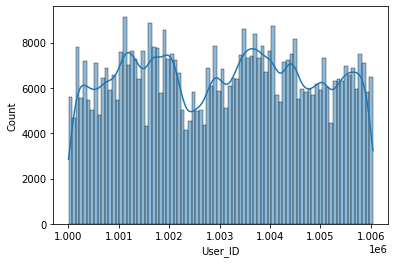

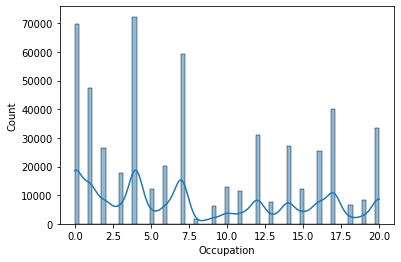

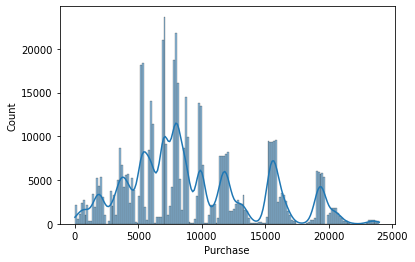

In [82]:
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  num_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

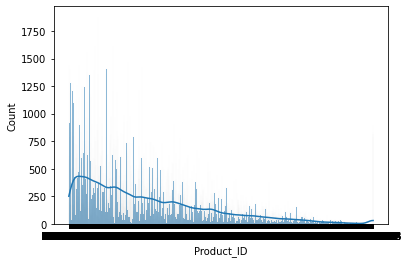

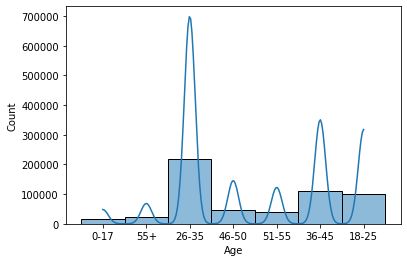

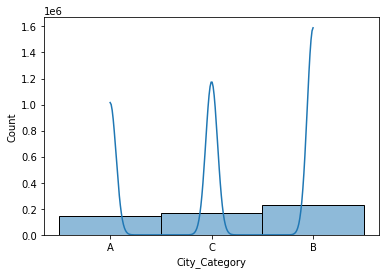

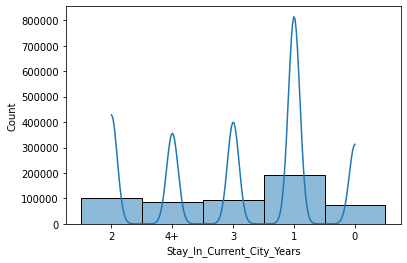

In [83]:
object_variables = working_df.select_dtypes(['object'])
for col in object_variables:
  obj_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

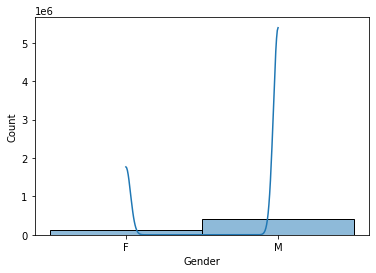

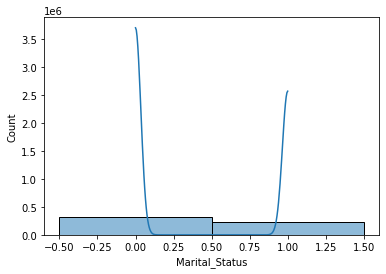

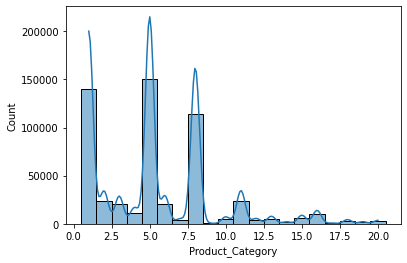

In [84]:
category_variables = working_df.select_dtypes(['category'])
for col in category_variables:
  cat_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

### Bivariate Analysis

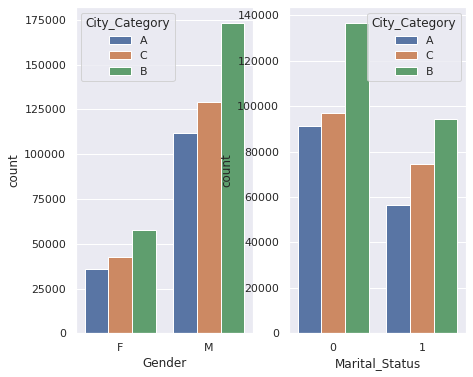

In [90]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 6)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='City_Category', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='City_Category', ax=ax[1])
plt.show()

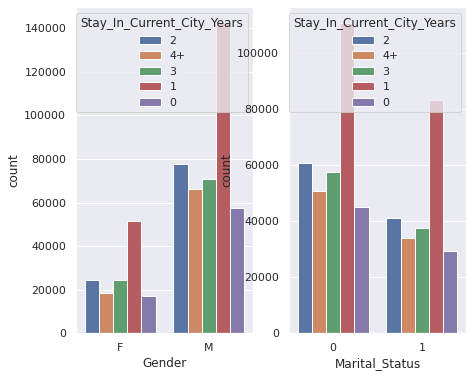

In [92]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 6)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Stay_In_Current_City_Years', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Stay_In_Current_City_Years', ax=ax[1])
plt.show()

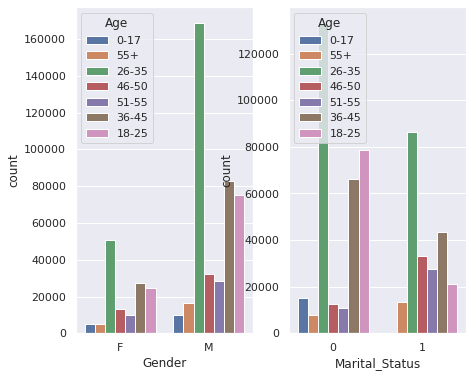

In [94]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 6)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Age', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Age', ax=ax[1])
plt.show()

### Boxplot for Categorical Variables

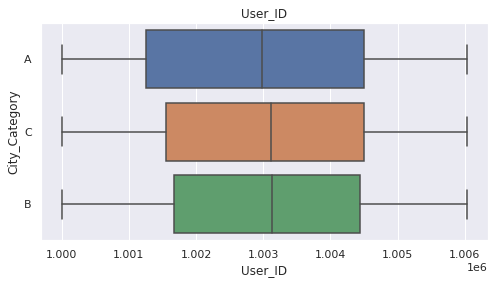

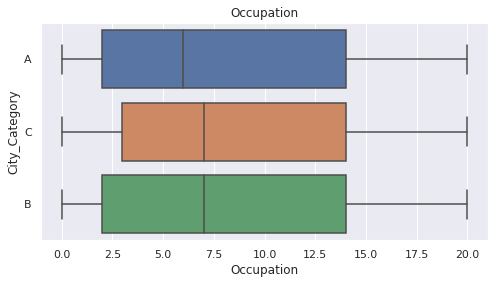

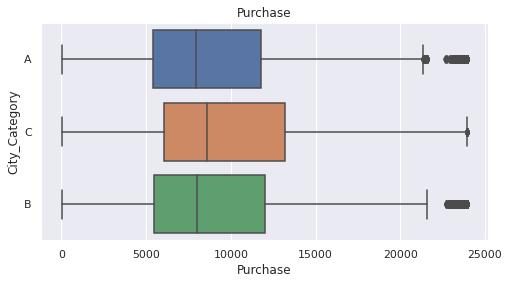

In [97]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='City_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

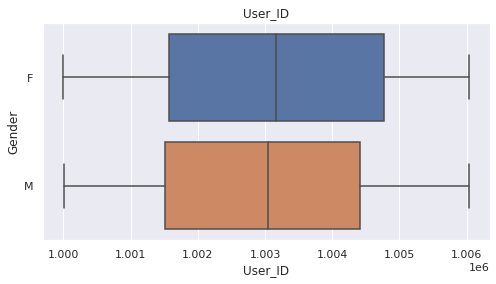

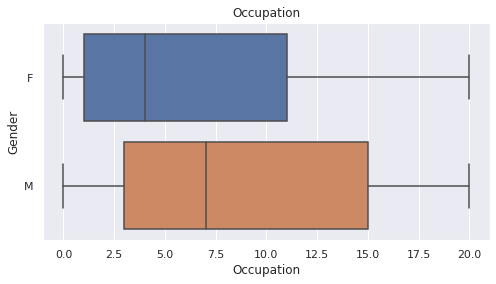

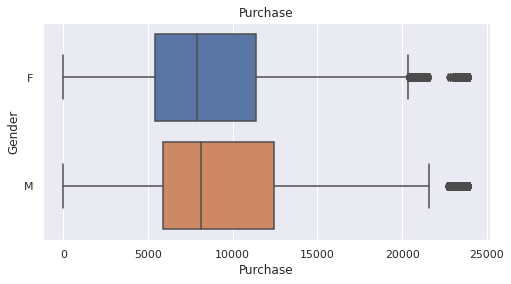

In [99]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Gender')
  g.set(title=f'{col}')
  plt.show()
  print()

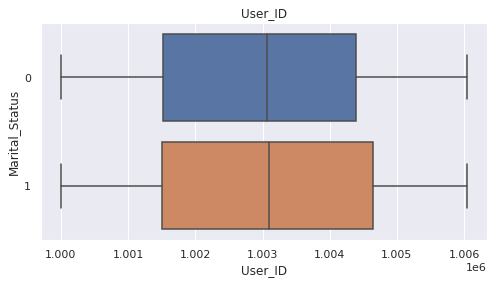

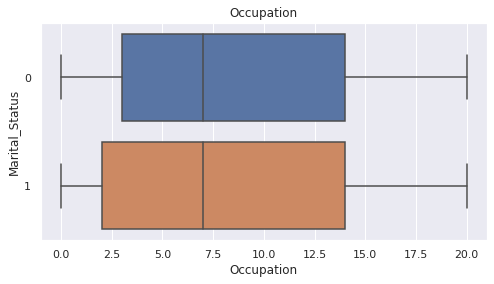

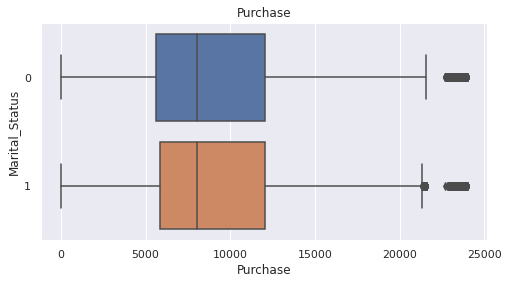

In [103]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Marital_Status')
  g.set(title=f'{col}')
  plt.show()
  print()

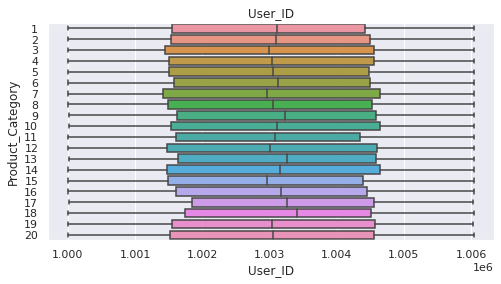

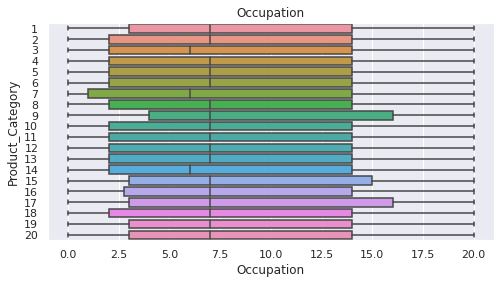

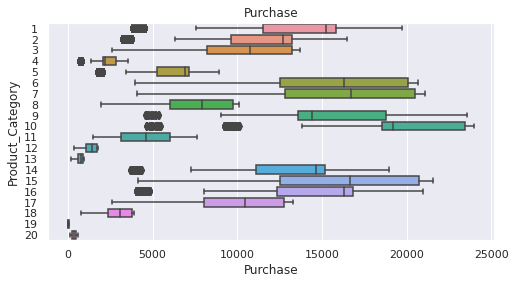

In [104]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Product_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

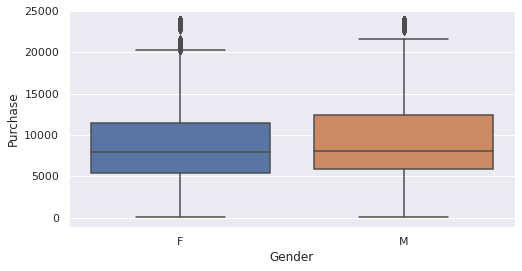

In [106]:
sns.boxplot(x='Gender', y='Purchase', data=working_df)

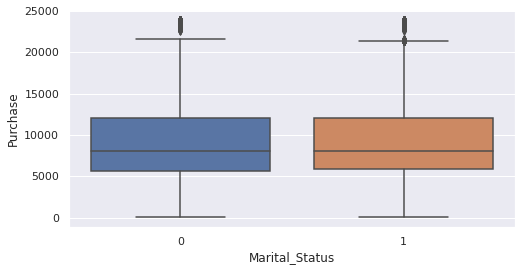

In [105]:
sns.boxplot(x='Marital_Status', y='Purchase', data=working_df)

In [107]:
# Highest fequecy of each Category attribute
working_df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [108]:
# Top 5 items ini each category
col_list = working_df.columns
for column in col_list:
  print(working_df[column].value_counts().head())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64
5     150933
1     140378
8     113925
11     24287
2      23864
Name: Product_Category, dtype: int64
7011    191
7193    188
6855    187
6891    184
7012    183
Name: Purchase, dtype: int64


### Correlation Analyis using Pairplot, Heatmap

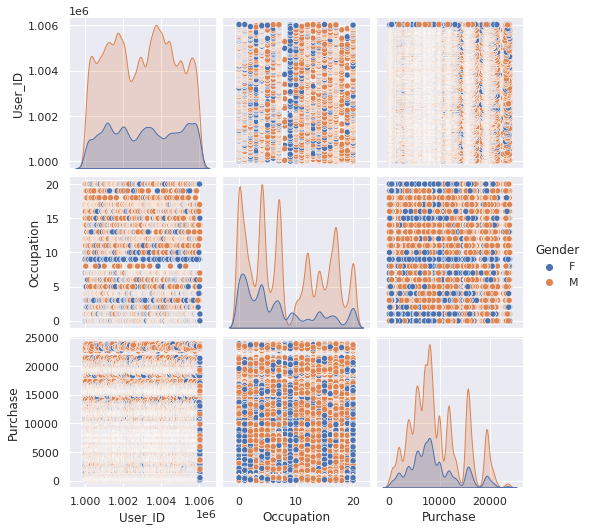

In [111]:
sns.pairplot(working_df, hue='Gender')
plt.show()

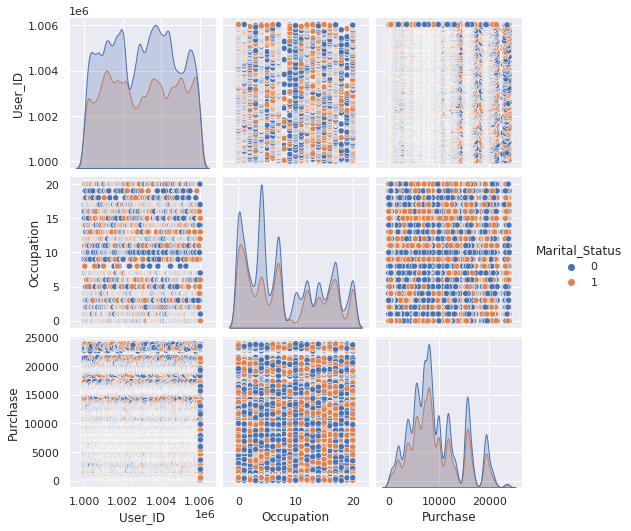

In [112]:
sns.pairplot(working_df, hue='Marital_Status')
plt.show()

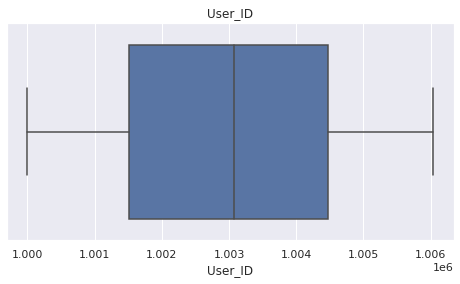

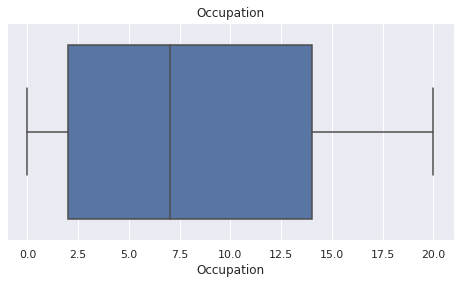

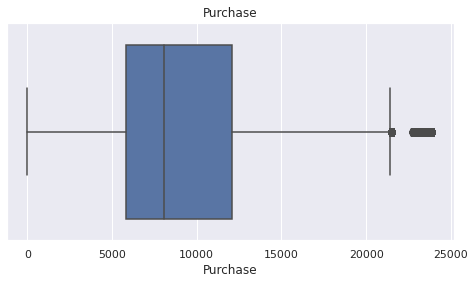

In [115]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize': (8, 4)})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col)
  g.set(title=f'{col}')
  plt.show()
  print()

In [117]:
working_df.isnull().all(axis=0)

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool